In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import numpy as np

In [ ]:
data = pd.read_csv("../Week6-ML/csv/data.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

Unnamed: 0        0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
data["Age"].fillna(value=data["Age"].median(), inplace=True)

In [ ]:
data["Embarked"].mode()[0]

'S'

In [ ]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [ ]:
# [0]: Since .mode() can return multiple values as a Series, [0] selects the first mode (the most frequent value).

In [ ]:
data["Fare"].fillna(data["Fare"].median(), inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

In [ ]:
# Here's a breakdown of what it does:

# pd.get_dummies(): This function converts categorical values into dummy/indicator variables (one-hot encoding).
# data: The input DataFrame that contains a column 'Embarked' with categorical values.
# columns=['Embarked']: Specifies that only the 'Embarked' column should be transformed into dummy variables.
# drop_first=True: Drops the first category to avoid multicollinearity (when using these dummy variables in models like linear regression), ensuring that the remaining dummy variables can represent all categories without redundancy.

# if the 'Embarked' column had three categories: S, C, and Q, using this code would create two new columns (e.g., Embarked_C and Embarked_Q), and the dropped category (S) would be represented when both new columns are 0.

In [ ]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# map categorical into 1 and 0

In [ ]:
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})

In [ ]:
# Standardization is important in machine learning to ensure that features are on a similar scale

In [ ]:
data[["Age", "Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
1304,28.0,8.0500
1305,39.0,108.9000
1306,38.5,7.2500
1307,28.0,8.0500


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data[["Age", "Fare"]] = scaler.fit_transform(data[["Age", "Fare"]])

In [ ]:
data[["Age", "Fare"]]

,Age,Fare
0,-0.581628,-0.503291
1,0.658652,0.734744
2,-0.271558,-0.490240
3,0.426099,0.383183
4,0.426099,-0.487824
...,...,...
1304,-0.116523,-0.487824
1305,0.736169,1.462034
1306,0.697411,-0.503291
1307,-0.116523,-0.487824


In [ ]:
# Drop columns that won't be used in the model
data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [ ]:
# Fill missing Survived values with the most frequent value (mode)

data["Survived"].fillna(data["Survived"].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
# Split data into X and y
y = data["Survived"]
X = data.drop(columns=["Survived"])

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Apply Lasso to perform feature selection
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

In [ ]:
# LassoCV: This is a Lasso regression model with built-in cross-validation to find the best value for the regularization parameter (alpha). The Lasso algorithm works by shrinking some coefficients to zero, which can be used for feature selection.
# cv=5: This specifies 5-fold cross-validation to tune the regularization parameter.
# .fit(X_train, y_train): Fits the Lasso model to the training data X_train (the features) and y_train (the target variable).

# Get selected features
coef = np.where(lasso.coef_ != 0)[0]

# lasso.coef_: After training, this attribute contains the coefficients of the Lasso model for each feature. If a feature's coefficient is 0, it means Lasso deemed it irrelevant.
# np.where(lasso.coef_ != 0)[0]: This selects the indices of features where the coefficients are not zero, meaning those features were selected by Lasso.
selected_features = X.columns[coef]

# X.columns[coef]: Using the indices of non-zero coefficients (coef), this maps back to the actual feature names that were selected by Lasso.
print("Selected features by Lasso:", selected_features)

Selected features by Lasso: Index(['PassengerId', 'Pclass', 'Sex'], dtype='object')


In [ ]:
# Lasso performs both regularization and feature selection. By setting some coefficients to zero, it automatically removes irrelevant or redundant features, making it useful for identifying important features in your dataset.

In [ ]:
# Split data into X and y
X = data[["PassengerId", "Pclass", "Sex"]]
y = data["Survived"]

In [ ]:
classifier = DecisionTreeClassifier(random_state=42).fit(X=X, y=y)

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4518358184070122, 0.984375, 'x[0] <= 890.5\ngini = 0.386\nsamples = 1309\nvalue = [967.0, 342.0]'),
 Text(0.44573825743140244, 0.953125, 'x[2] <= 0.5\ngini = 0.473\nsamples = 890\nvalue = [548, 342]'),
 Text(0.18521341463414634, 0.921875, 'x[1] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.08231707317073171, 0.890625, 'x[0] <= 362.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.06707317073170732, 0.859375, 'x[0] <= 357.5\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.06097560975609756, 0.828125, 'x[0] <= 315.0\ngini = 0.138\nsamples = 67\nvalue = [5, 62]'),
 Text(0.054878048780487805, 0.796875, 'x[0] <= 312.5\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.04878048780487805, 0.765625, 'x[0] <= 206.0\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.036585365853658534, 0.734375, 'x[0] <= 198.0\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.03048780487804878, 0.703125, 'x[0] <= 172.5\ngini = 0.137\nsamples = 27\nva

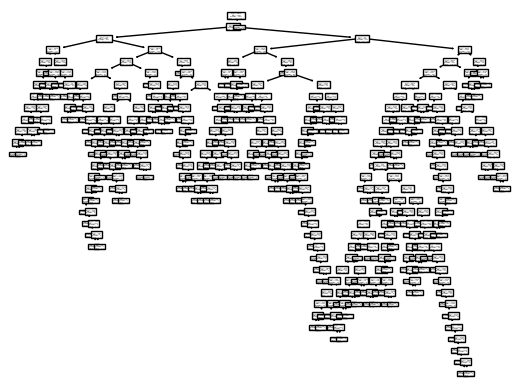

In [ ]:
plot_tree(decision_tree=classifier)

[Text(0.5625, 0.9, 'x[0] <= 890.5\ngini = 0.386\nsamples = 1309\nvalue = [967.0, 342.0]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.473\nsamples = 890\nvalue = [548, 342]'),
 Text(0.25, 0.5, 'x[1] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.125, 0.3, 'x[0] <= 362.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'x[0] <= 396.0\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.307\nsamples = 576\nvalue = [467, 109]'),
 Text(0.625, 0.3, 'x[0] <= 187.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.3, 'x[0] <= 840.0\ngini = 0.242\nsamples = 454\nvalue = [390, 64]'),
 Text(0.8125, 0.1, '\n  (...)  \n'),
 Text(0.9375, 0.1, '\n  (...)  \n'),
 Text(0.625, 0.7, 'gini = 0.0\nsampl

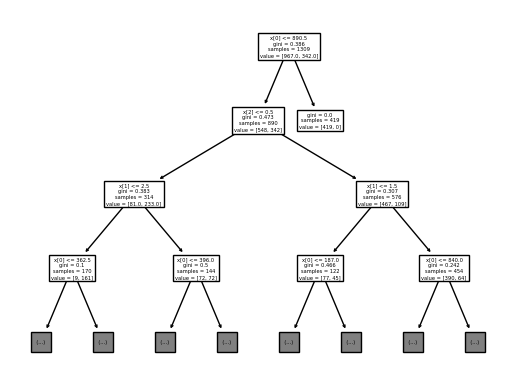

In [ ]:
plot_tree(decision_tree=classifier, max_depth=3)

[Text(0.5625, 0.9, 'PassengerId <= 890.5\ngini = 0.386\nsamples = 1309\nvalue = [967.0, 342.0]\nclass = Not Survived'),
 Text(0.5, 0.7, 'Sex <= 0.5\ngini = 0.473\nsamples = 890\nvalue = [548, 342]\nclass = Not Survived'),
 Text(0.25, 0.5, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]\nclass = Survived'),
 Text(0.125, 0.3, 'PassengerId <= 362.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'PassengerId <= 396.0\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Not Survived'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Pclass <= 1.5\ngini = 0.307\nsamples = 576\nvalue = [467, 109]\nclass = Not Survived'),
 Text(0.625, 0.3, 'PassengerId <= 187.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]\nclass = Not Survived'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.3,

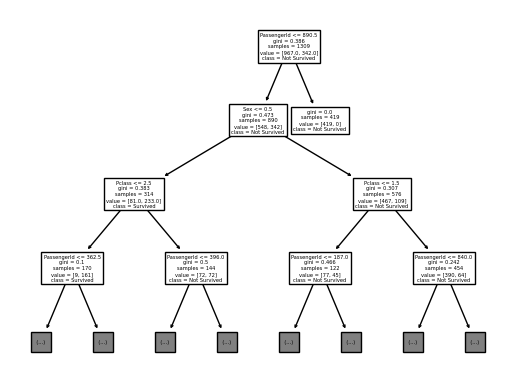

In [ ]:
plot_tree(
    decision_tree=classifier,
    max_depth=3,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
)

[Text(0.5625, 0.9, 'PassengerId <= 890.5\ngini = 0.386\nsamples = 1309\nvalue = [967.0, 342.0]\nclass = Not Survived'),
 Text(0.5, 0.7, 'Sex <= 0.5\ngini = 0.473\nsamples = 890\nvalue = [548, 342]\nclass = Not Survived'),
 Text(0.25, 0.5, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]\nclass = Survived'),
 Text(0.125, 0.3, 'PassengerId <= 362.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'PassengerId <= 396.0\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Not Survived'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Pclass <= 1.5\ngini = 0.307\nsamples = 576\nvalue = [467, 109]\nclass = Not Survived'),
 Text(0.625, 0.3, 'PassengerId <= 187.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]\nclass = Not Survived'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.3,

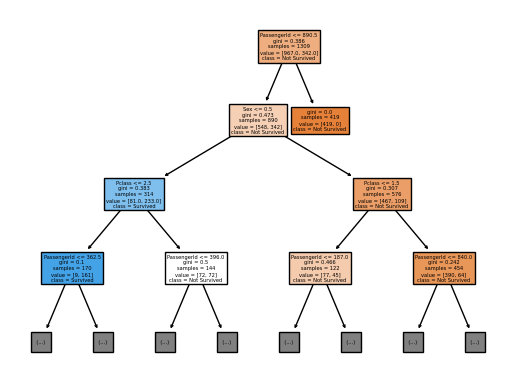

In [ ]:
plot_tree(
    decision_tree=classifier,
    max_depth=3,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
)